In [2]:
#1. import
from bs4 import BeautifulSoup
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)


In [3]:
#2. Import dataset
data = pd.read_csv('data/measurements.csv')

In [4]:
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [6]:
file2_location = 'data/measurements2.xlsx'
data2 = pd.read_excel(file2_location)
data2

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


Both datasets appear to be the same, so working with just the first dataset.

In [7]:
#3. Lets start cleaning the data. 
nulls_percent_df = pd.DataFrame(data.isna().sum()/len(data)).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

,column_name,nulls_percentage
0,distance,0.000000
1,consume,0.000000
2,speed,0.000000
3,temp_inside,0.030928
4,temp_outside,0.000000
5,specials,0.760309
6,gas_type,0.000000
7,AC,0.000000
8,rain,0.000000
9,sun,0.000000


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      388 non-null    object 
 1   consume       388 non-null    object 
 2   speed         388 non-null    int64  
 3   temp_inside   388 non-null    float64
 4   temp_outside  388 non-null    int64  
 5   gas_type      388 non-null    object 
 6   AC            388 non-null    int64  
 7   rain          388 non-null    int64  
 8   sun           388 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 27.4+ KB


A. As there was no information given as to whcih columns values are needed, in this case I will drop the columns with above 75% of the values missing for now. This will be the columns refill liters, refill gas, and specials. 


B. For the column temp_inside, as the number of NaN values are low, we can have a look at the distribution of the data and decide whether to replace with mean, mode or the median. Also the commas have to be replace with decimal point and the type has to be changed to integer. 


C. I also notice that for the columns distance and consume we have to change commas to decimal points and then the type to numbers

In [10]:
# A.
#dropping columns with more than 80% of the data missing: 'refill liters', 'refill gas', 'specials'  
data.drop(['refill liters', 'refill gas', 'specials'], axis=1, inplace=True)

In [11]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28,5,26,"21,5",12,E10,0,0,0
1,12,"4,2",30,"21,5",13,E10,0,0,0
2,"11,2","5,5",38,"21,5",15,E10,0,0,0
3,"12,9","3,9",36,"21,5",14,E10,0,0,0
4,"18,5","4,5",46,"21,5",15,E10,0,0,0


In [19]:
# B.
#Now cleaning the column temp_inside. First replacing ',' with'.'
#Second converting it into a numeric data type
data["temp_inside"]=data["temp_inside"].str.replace(',','.')
data.temp_inside = pd.to_numeric(data.temp_inside, errors='coerce')

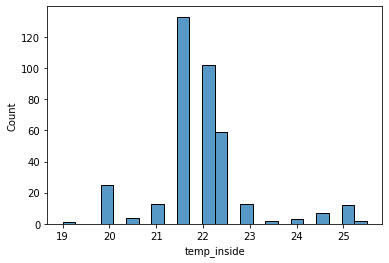

In [24]:
#Plotting the temp_inside column to see if we fiLL the NaN with mean, median or mode
sns.histplot(data[data['temp_inside'].notna()]['temp_inside']) 
plt.show()


In [31]:
#Filling the NaNs with median as that should be fine. 
print(data['temp_inside'].median())
m = data['temp_inside'].median()
data['temp_inside'] = data['temp_inside'].fillna(m) # Replacing the null values with the most represented categoty

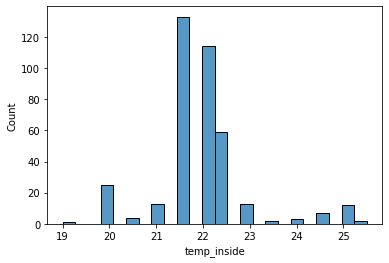

In [32]:
#Plotting column after filling with median, looks alright. 
sns.histplot(data[data['temp_inside'].notna()]['temp_inside']) 
plt.show()

In [35]:
# C. 
#Now lets quickly clean the columns distance and consume 
#we have to change commas to decimal points and then the type to numbers
data["distance"]=data["distance"].str.replace(',','.')
data.distance = pd.to_numeric(data.distance, errors='coerce')
data['distance'].value_counts()

11.8    37
16.0    24
12.3    23
12.4    18
15.4    14
        ..
44.9     1
36.6     1
9.9      1
16.8     1
14.7     1
Name: distance, Length: 174, dtype: int64

In [37]:
data["consume"]=data["consume"].str.replace(',','.')
data.consume = pd.to_numeric(data.consume, errors='coerce')
data['consume'].value_counts()

5.0     27
4.5     27
4.6     22
4.7     21
4.3     20
4.1     20
5.1     19
4.8     19
4.4     17
4.0     17
4.9     16
4.2     15
5.3     14
3.9     14
5.2     12
3.8     11
5.7     11
5.6     10
5.4      9
3.7      8
5.8      7
5.5      6
5.9      5
3.6      4
6.4      4
6.1      4
6.2      4
6.0      4
6.3      4
8.1      2
6.5      2
7.4      2
6.9      1
8.7      1
12.2     1
7.9      1
10.8     1
9.9      1
7.1      1
3.3      1
9.0      1
11.5     1
6.6      1
Name: consume, dtype: int64

In [38]:
#NO MORE NULL VALUES 
nulls_percent_df = pd.DataFrame(data.isna().sum()/len(data)).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

,column_name,nulls_percentage
0,distance,0.0
1,consume,0.0
2,speed,0.0
3,temp_inside,0.0
4,temp_outside,0.0
5,gas_type,0.0
6,AC,0.0
7,rain,0.0
8,sun,0.0


In [39]:
#ALL data are of the appropriate data type, lets export it as a csv file
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      388 non-null    float64
 1   consume       388 non-null    float64
 2   speed         388 non-null    int64  
 3   temp_inside   388 non-null    float64
 4   temp_outside  388 non-null    int64  
 5   gas_type      388 non-null    object 
 6   AC            388 non-null    int64  
 7   rain          388 non-null    int64  
 8   sun           388 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 27.4+ KB


In [44]:
data.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,41.927835,21.931701,11.358247,0.077320,0.123711,0.082474
std,22.667837,1.033172,13.598524,0.994741,6.991542,0.267443,0.329677,0.275441
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000


In [46]:
#Export dataset to plot on Tableau
data.to_csv(r'data/cleaned_data.csv', index = False)

In [48]:
data['gas_type'].value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

In [50]:
#Lets filter the gas types into two seperate variables
e10 = data[data['gas_type'] == 'E10']
sp98 = data[data['gas_type'] == 'SP98']

In [53]:
e10['distance'].mean()

21.096250000000005

In [55]:
sp98['distance'].mean()

18.639912280701765

In [56]:
e10['speed'].mean()

43.50625

In [57]:
sp98['speed'].mean()

40.82017543859649

In [58]:
e10['consume'].mean()

4.931250000000001

In [59]:
sp98['consume'].mean()

4.899122807017543

<AxesSubplot:title={'center':'consume'}, xlabel='gas_type'>

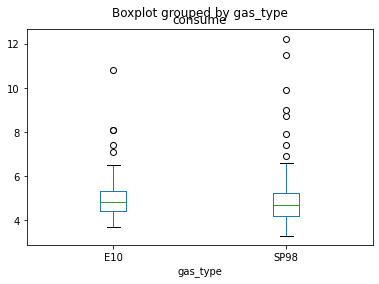

In [60]:
data.boxplot(by ='gas_type', column =['consume'], grid = False)

In [62]:
display(e10['temp_inside'].mean())
display(sp98['temp_inside'].mean())

21.91875

21.94078947368421

<AxesSubplot:title={'center':'temp_inside'}, xlabel='gas_type'>

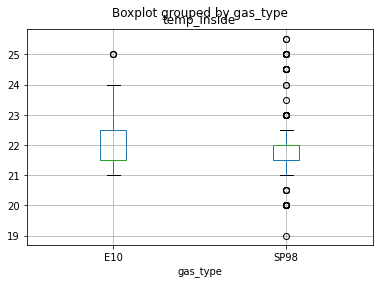

In [63]:
data.boxplot(by ='gas_type', column =['temp_inside'])

<AxesSubplot:title={'center':'temp_outside'}, xlabel='gas_type'>

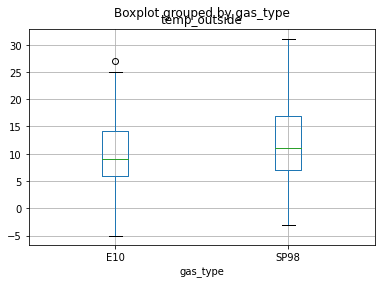

In [64]:
data.boxplot(by ='gas_type', column =['temp_outside'])